###  線性回歸: y = w1*x1 + w2*x2 + w3*x3.... + b                                 
###  由直線方程式轉換成彎曲的方程式需要一個函式: sigmoid function                   
###  sigmoid function = 1 / 1 + e(a constant)**-y 
###  邏輯回歸: y = 1 / 1 + e**-(w1*x1 + w2*x2 + w3*x3.... + b)      

In [1]:
import pandas as pd
data = pd.read_csv('Diabetes_Data.csv')
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [2]:
data["Gender"] = data["Gender"].map({"男生": 1, "女生": 0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [3]:
from sklearn.model_selection import train_test_split
x = data[["Age", "Weight", "BloodSugar", "Gender"]]
y = data["Diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

###  使用 "sigmoid function" 輸出的值只會在0到1之間

In [5]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
w = np.array([1, 2, 3, 4])
b = 1
z = (w * x_train).sum(axis=1) + b
y_predict = sigmoid(z)

### Cost Function - Binary Cross Entropy

cost:                                                                            
when y = 1, cost = -log(y_predict)                                               
when y = 0, cost = -log(1 - y_predict)                                           
concat: cost = -y * log(y_predict) - (1 - y) * log(1 - y_predict)  

In [7]:
cost = -y_train * np.log(y_predict) - (1 - y_train) * np.log(1 - y_predict)
cost.mean()

1.3959515636868534

In [8]:
def compute_cost(x, y, w, b):
    z = (w * x).sum(axis=1) + b
    y_predict = sigmoid(z)
    cost = -y * np.log(y_predict) - (1 - y) * np.log(1 - y_predict)
    cost = cost.mean()
    return cost

In [9]:
w = np.array([1, 4, 2, 4])
b = 2
compute_cost(x_train, y_train, w, b)

1.9542777292019753

### Optimizer

根據-y * log(y_predict) - (1 - y) * log(1 - y_predict)來做微分
    w1微分 = 2 * x1(y_predict - y)                                               
    W2微分 = 2 * x2(y_predict - y)                                               
    W3微分 = 2 * x3(y_predict - y)                                               
    W4微分 = 2 * x4(y_predict - y)                                               
    b微分 = 2(y_predict - y)
接著開始更新w以及b                                                           
    w1 - w1方向斜率 * 學習率                                                      
    w2 - w2方向斜率 * 學習率                                                      
    w3 - w3方向斜率 * 學習率                                                      
    w4 - w4方向斜率 * 學習率                                                      
    b - b方向斜率 * 學習率

In [10]:
z = (w * x_train).sum(axis=1) + b
y_predict = sigmoid(z)
b_gradient = (y_predict - y_train).mean()

w_gradient = np.zeros(x_train.shape[1])
for i in range(x_train.shape[1]):
    w_gradient[i] = (x_train[:, i] * (y_predict - y_train)).mean()

w_gradient, b_gradient

(array([ 0.04176112,  0.13246515, -0.12945482,  0.21952511]),
 0.29409673395976715)

In [11]:
def compute_gradient(x, y, w, b):
    '''
    Returns:
    w_gradient(微分結果, a array), b_gradient(微分結果)
    
    Parameters:
    x, y(data)
    w, b(a array of weight, a constant of bias)
    '''
    z = (w * x_train).sum(axis=1) + b
    y_predict = sigmoid(z)
    b_gradient = (y_predict - y).mean()

    w_gradient = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        w_gradient[i] = (x[:, i] * (y_predict - y)).mean()

    return w_gradient, b_gradient

In [12]:
w = np.array([1, 2, 2, 3])
b = 5
compute_gradient(x_train, y_train, w, b)

(array([ 0.02951124, -0.00123345, -0.20911372,  0.15024735]),
 0.518806798216479)

In [13]:
w = np.array([1, 2, 2, 3])
b = 5
learning_rate = 1

w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)

print(compute_cost(x_train, y_train, w, b))

w = w - w_gradient * learning_rate
b = b - b_gradient * learning_rate
print(w, b)
print(compute_cost(x_train, y_train, w, b))

2.8154062345431683
[0.97048876 2.00123345 2.20911372 2.84975265] 4.481193201783521
2.487342502355539


In [14]:
np.set_printoptions(formatter={'float': '{: .2e}'.format})
#需要轉換格式因為w以及w_gradient是一個陣列形態
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):
    
    c_hist = []
    w_hist = []
    b_hist = []
    
    w = w_init
    b = b_init

    for i in range(run_iter + 1):
        w_gradient, b_gradient = gradient_function(x, y, w, b)

        w = w - w_gradient*learning_rate
        b = b - b_gradient*learning_rate
        cost = cost_function(x, y, w, b)

        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)

        if i%p_iter == 0:
            print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient}, b_gradient: {b_gradient: .2e}")

    return w, b, w_hist, b_hist, c_hist

In [15]:
w_init = np.array([1, 2, 2, 3])
b_init = 5
learning_rate = 1
run_iter = 10000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  2.4873e+00, w: [ 9.70e-01  2.00e+00  2.21e+00  2.85e+00], b:  4.48e+00, w_gradient: [ 2.95e-02 -1.23e-03 -2.09e-01  1.50e-01], b_gradient:  5.19e-01


Iteration  1000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 5.36e-07  1.44e-06 -7.74e-06  4.51e-07], b_gradient:  3.32e-06
Iteration  2000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 4.40e-10  1.18e-09 -6.36e-09  3.70e-10], b_gradient:  2.73e-09
Iteration  3000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 3.61e-13  9.73e-13 -5.22e-12  3.04e-13], b_gradient:  2.24e-12
Iteration  4000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 2.98e-16  8.01e-16 -4.30e-15  2.44e-16], b_gradient:  1.92e-15
Iteration  5000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 1.94e-17  2.36e-17 -4.33e-16  1.39e-17], b_gradient:  2.05e-16
Iteration  6000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 1.94e-17  2.36e-17 -4.33e

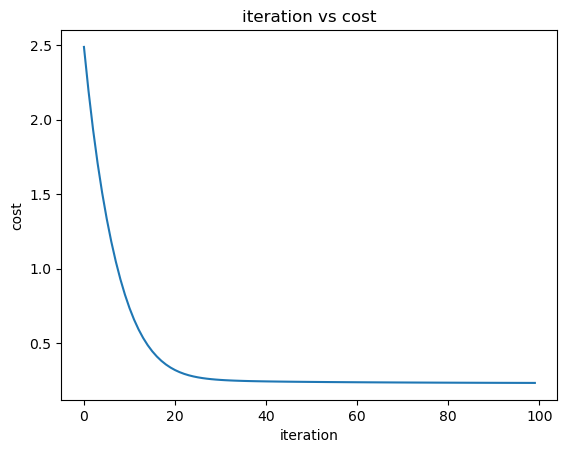

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

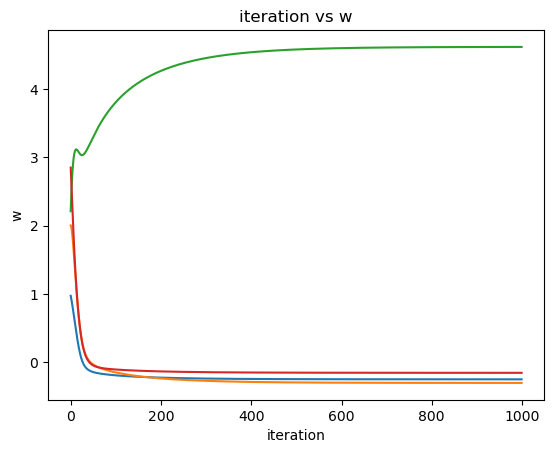

In [17]:
plt.plot(np.arange(0, 1000), w_hist[:1000])
plt.title("iteration vs w")
plt.xlabel("iteration")
plt.ylabel("w")
plt.show()

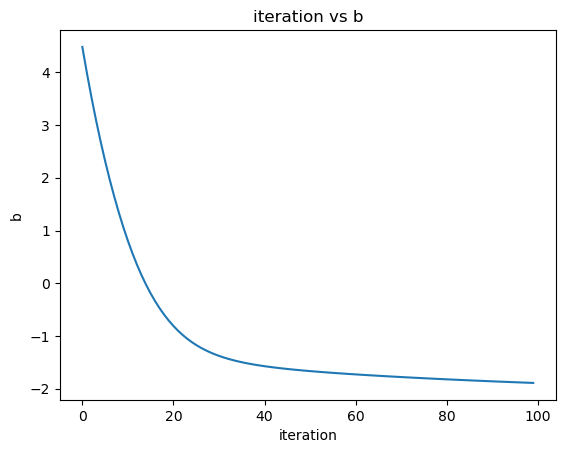

In [18]:
plt.plot(np.arange(0, 100), b_hist[:100])
plt.title("iteration vs b")
plt.xlabel("iteration")
plt.ylabel("b")
plt.show()

In [19]:
w_final, b_final

(array([-2.53e-01, -3.06e-01,  4.62e+00, -1.58e-01]), -2.2423167596289706)

In [20]:
z = (w_final*x_test).sum(axis=1) + b_final
y_predict = sigmoid(z)

y_predict = np.where(y_predict > 0.5, 1, 0)
#尋找y_predict裡面所有的值，只要裡面的值大於0.5的話，就把它替換成1；若小於或等於0.5的把它，替換成0。

accuracy = (y_test == y_predict).sum() / len(y_test)
print(f'Correct rate: {accuracy}')

Correct rate: 0.9


### 套用到真實狀況

In [21]:
# 72 92 102 女生
# 62 52 120 男生
x_real = np.array([[72, 92, 102, 0], [62, 52, 120, 1]])
x_real = scaler.transform(x_real)
z = (w_final*x_real).sum(axis=1) + b_final
y_real = sigmoid(z)
y_real

array([ 4.35e-02,  7.08e-01])

### There many helpful model for us in 'Scikit learn'

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_predict = logistic_model.predict(x_test)
accuracy = (y_test == y_predict).sum() / len(y_test)
print(f'Correct rate: {accuracy}')

Correct rate: 0.8875


In [23]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_predict = svm_model.predict(x_test)
accuracy = (y_test == y_predict).sum() / len(y_test)
print(f'Correct rate: {accuracy}')

Correct rate: 0.8875
